In [48]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 20

sns.set_style('whitegrid')

In [6]:
df = pd.read_csv('train.csv')
df.set_index('PassengerId', inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Female'] = df.Sex.apply(lambda x: 1 if x == 'female' else 0)
df = df.drop('Sex', axis=1)

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Filling in missing values

In [10]:
df.Age = df.Age.fillna(
    df.groupby('Female').Age.transform('mean')
)

df.Cabin = df.Cabin.str[0]

df.Embarked = df.Embarked.fillna(
    df.Embarked.value_counts().index[0]
)

In [12]:
numeric_columns = df.loc[:, df.dtypes != object].columns
categorical_columns = df.loc[:, df.dtypes == object].columns

In [89]:
df.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female
PassengerId,,,,,,,,,
403,0,3,21.000000,1,0,9.8250,NaN,S,1
791,0,3,30.726645,0,0,7.7500,NaN,Q,0
414,0,2,30.726645,0,0,0.0000,NaN,S,0
669,0,3,43.000000,0,0,8.0500,NaN,S,0
526,0,3,40.500000,0,0,7.7500,NaN,Q,0
510,1,3,26.000000,0,0,56.4958,NaN,S,0
404,0,3,28.000000,1,0,15.8500,NaN,S,0
156,0,1,51.000000,0,1,61.3792,NaN,C,0
327,0,3,61.000000,0,0,6.2375,NaN,S,0


#### EDA and feature engineering

Numeric columns

Text(0.5, 1.0, 'Numeric values correlation')

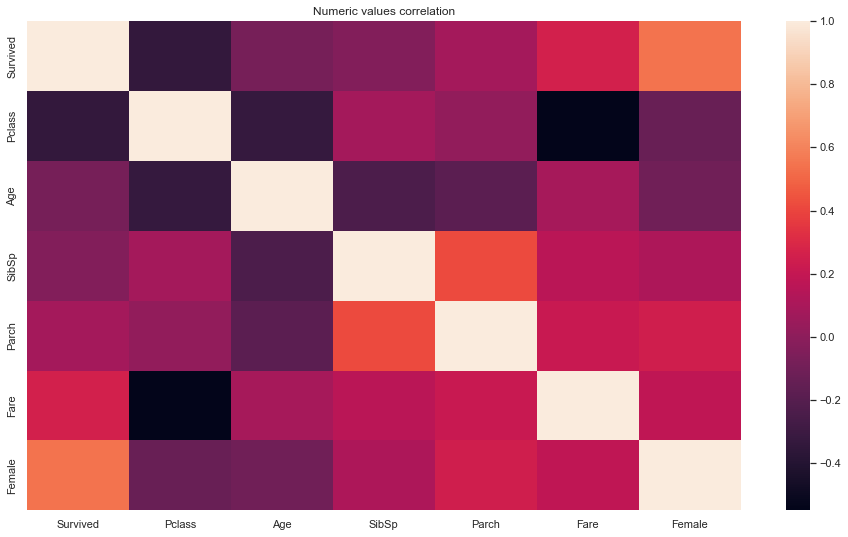

In [49]:
fig = plt.figure(figsize=(16, 9))

sns.heatmap(df[numeric_columns].corr())
plt.title('Numeric values correlation')

Text(0.5, 1.0, 'Passenger class counts')

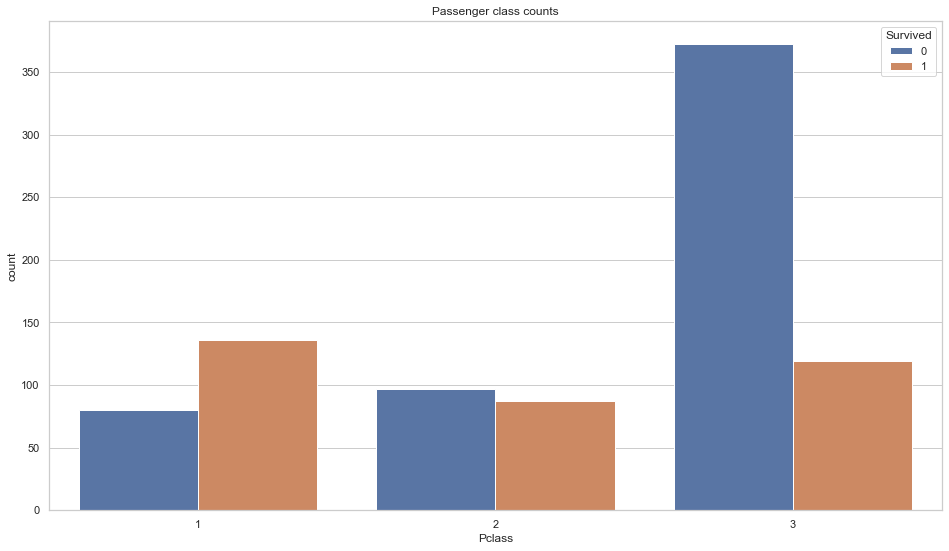

In [101]:
fig = plt.figure()

sns.countplot(x=df.Pclass, hue=df.Survived)
plt.title('Passenger class counts')

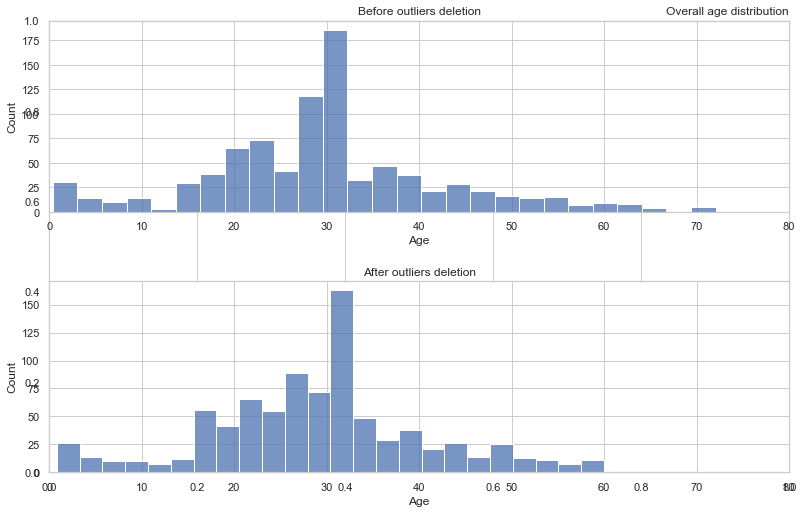

In [112]:
fig = plt.figure(figsize=(12, 8))
plt.title('Overall age distribution', loc='right')


ax1 = fig.add_subplot(2, 1, 1)
sns.histplot(df.Age)
plt.xlim((0, df.Age.max()))
plt.title('Before outliers deletion')


lower = df.Age.quantile(0.005)
upper = df.Age.quantile(0.975)

ax2 = fig.add_subplot(2, 1, 2)
sns.histplot(
    df[df.Age.between(lower, upper, inclusive='both')].Age
)
plt.xlim((0, df.Age.max()))
plt.title('After outliers deletion')


fig.tight_layout()

Removing age outliers

In [114]:

df = df[df.Age.between(lower, upper, inclusive='both')]

Text(0.5, 1.0, 'Deceased')

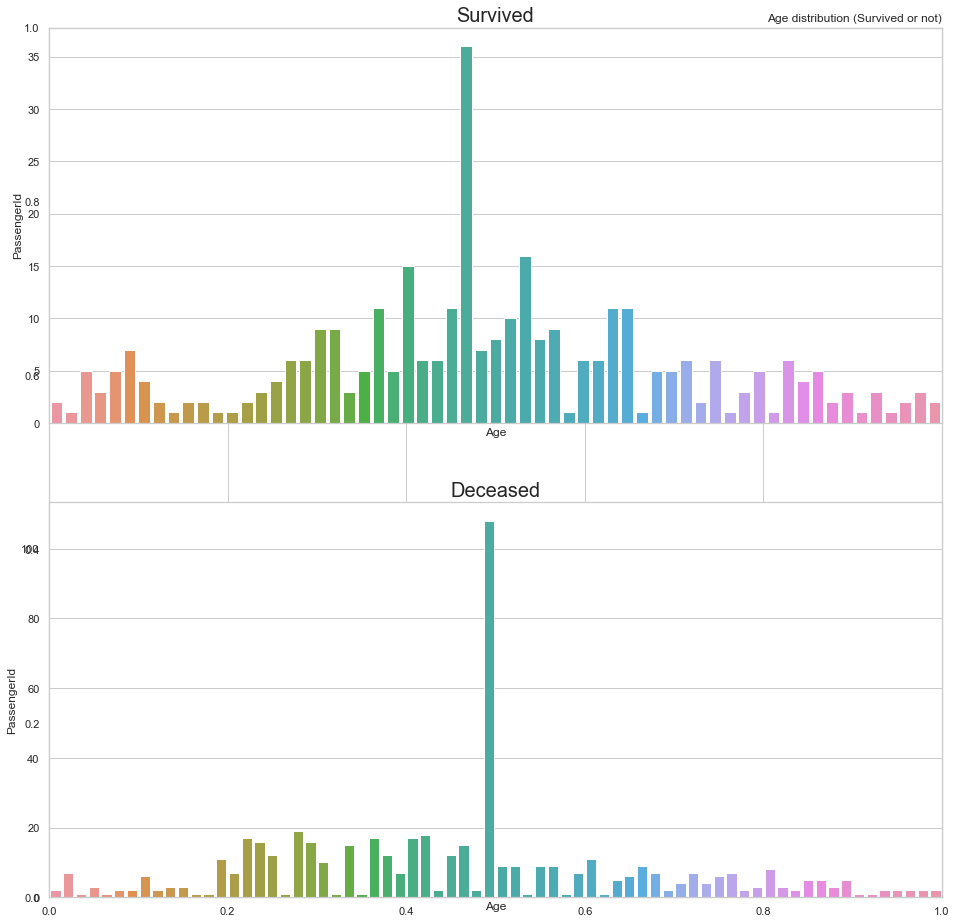

In [117]:
fig = plt.figure(figsize=(16, 16))
plt.title('Age distribution (Survived or not)', loc='right')

ax1 = fig.add_subplot(2, 1, 1)
grouped_age_df = df[df.Survived == 1].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Survived', fontsize=20)

ax2 = fig.add_subplot(2, 1, 2)
grouped_age_df = df[df.Survived == 0].reset_index() \
                .groupby('Age').PassengerId.count() 

sns.barplot(x=grouped_age_df.index, y=grouped_age_df)
plt.xticks([])
plt.title('Deceased', fontsize=20)

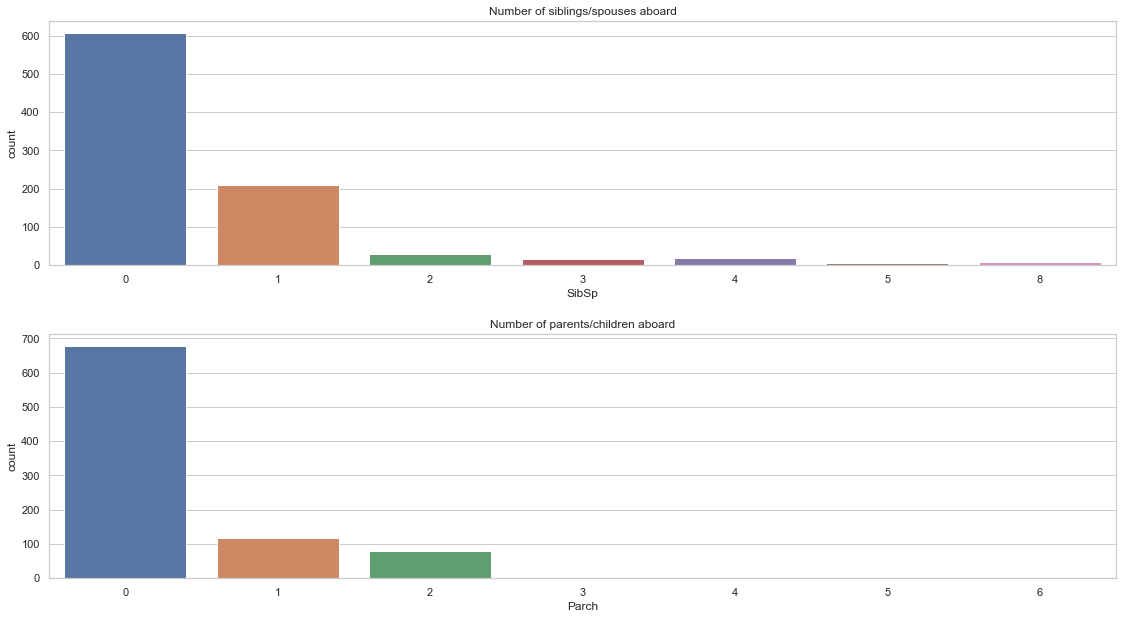

In [111]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
sns.countplot(df.SibSp)
plt.title('Number of siblings/spouses aboard')

ax2 = fig.add_subplot(2, 1, 2)
sns.countplot(df.Parch)
plt.title('Number of parents/children aboard')

fig.tight_layout()

Merging *SibSp* and *Parch* into *Relatives* column

In [118]:
df['Relatives'] = df.SibSp + df.Parch
df = df.drop(['SibSp', 'Parch'], axis=1)

Survivors' percentage for 0 relatives: 	 30.63583815028902
Survivors' percentage for 1 relatives: 	 55.063291139240505
Survivors' percentage for 2 relatives: 	 58.0
Survivors' percentage for 3 relatives: 	 70.37037037037037
Survivors' percentage for 4 relatives: 	 20.0
Survivors' percentage for 5 relatives: 	 14.285714285714286
Survivors' percentage for 6 relatives: 	 33.333333333333336
Survivors' percentage for 7 relatives:	 0
Survivors' percentage for 10 relatives:	 0


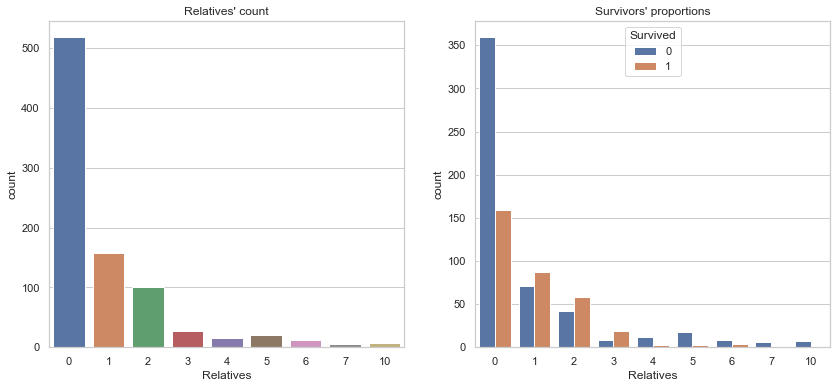

In [167]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(df.Relatives)
plt.title("Relatives' count")

ax2 = fig.add_subplot(1, 2, 2)
sns.countplot(x=df.Relatives, hue=df.Survived)
plt.title("Survivors' proportions")

for count in sorted(df.Relatives.unique()):
    if count in df[df.Survived == 1].Relatives.unique():
        percentage = 100 * df[df.Survived == 1].Relatives \
            .value_counts()[count] / df[df.Relatives == count].shape[0]
        print(f"Survivors' percentage for {count} relatives: \t {percentage}")
    else:
        print(f"Survivors' percentage for {count} relatives:\t 0")

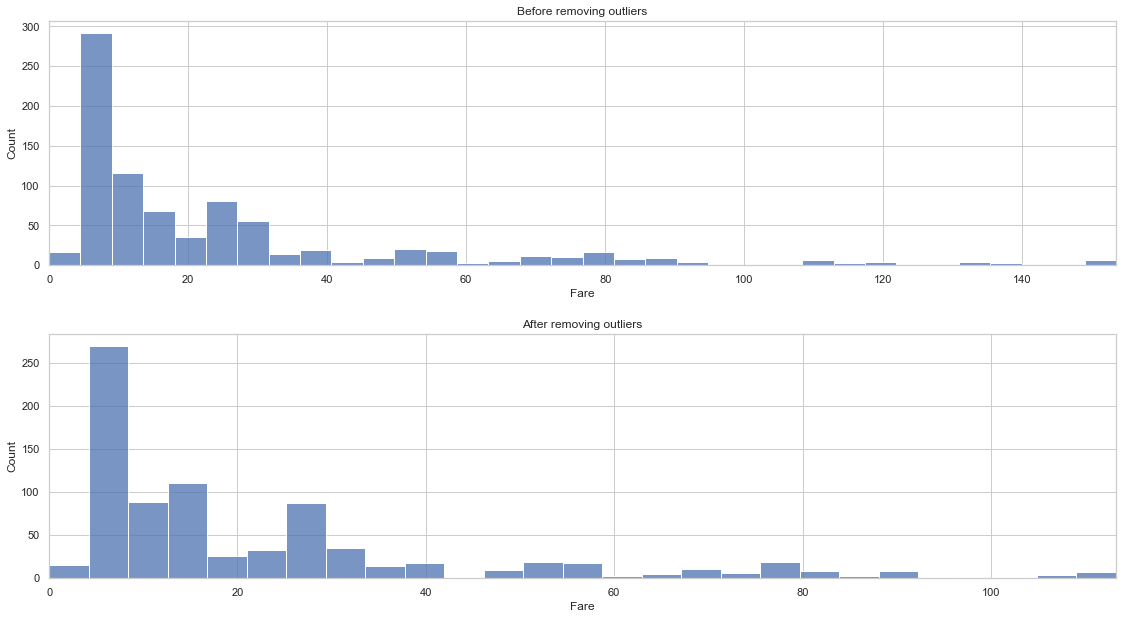

In [186]:
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(2, 1, 1)
sns.histplot(df.Fare)
plt.xlim((0, df.Fare.max()))
plt.title('Before removing outliers')

lower = df.Fare.quantile(0.005)
upper = df.Fare.quantile(0.975)

ax2 = fig.add_subplot(2, 1, 2)
sns.histplot(df[df.Fare.between(lower, upper, inclusive='both')].Fare)
plt.xlim((0, df[df.Fare <= upper].Fare.max()))
plt.title('After removing outliers')

fig.tight_layout()

Removing *Fare* outliers

In [175]:
df = df[df.Fare.between(lower, upper, inclusive='both')]

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

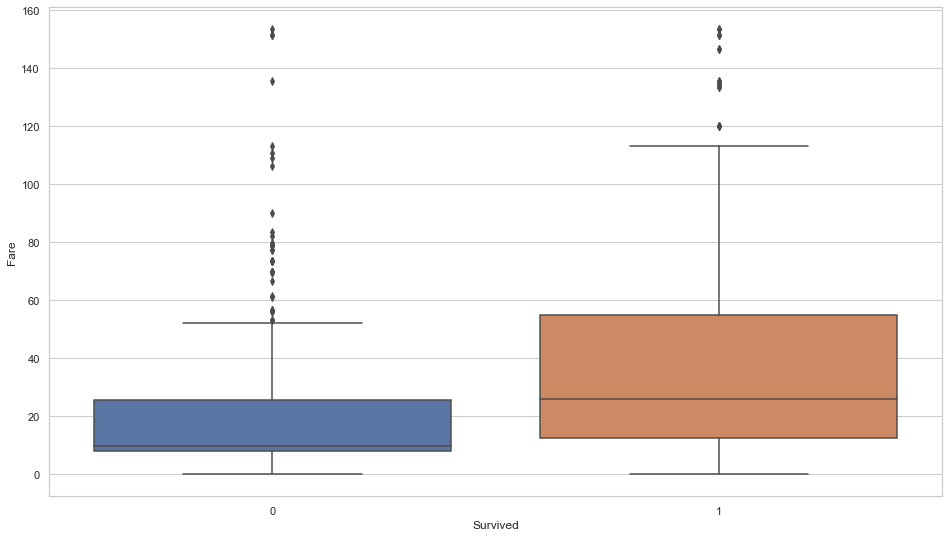

In [179]:
sns.boxplot(x=df.Survived, y=df.Fare)

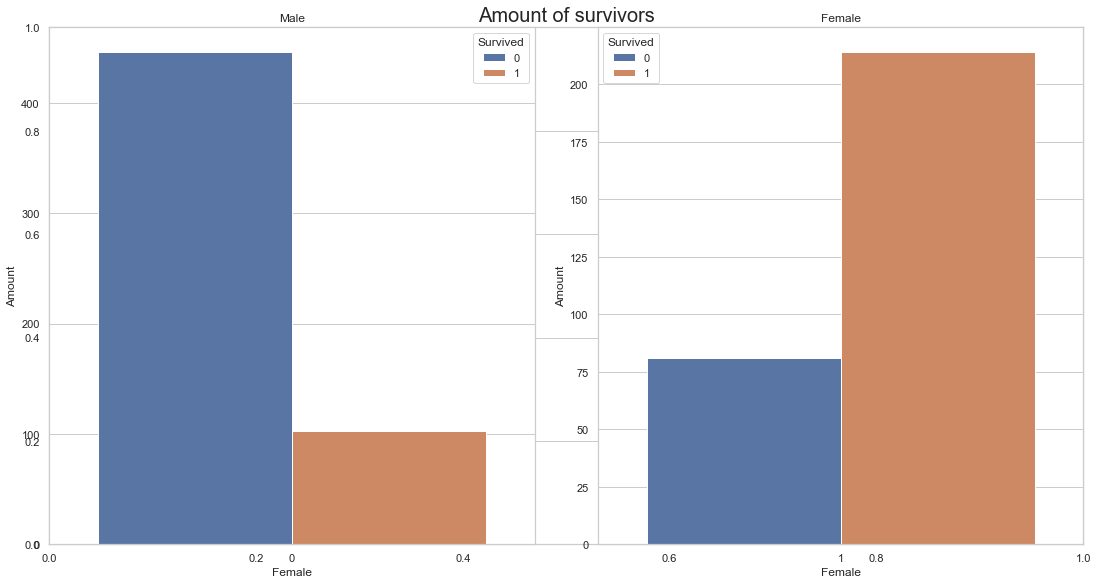

In [182]:
fig = plt.figure()
plt.title('Amount of survivors', fontsize=20)
for sex in df.Female.unique():
    ax = fig.add_subplot(1, 2, sex + 1)
    sns.countplot(x=df[df.Female == sex].Female, hue=df.Survived)
    
    plt.title('Female' if sex else 'Male')
    plt.ylabel('Amount')
plt.tight_layout()

Text(0.5, 0, 'Sex')

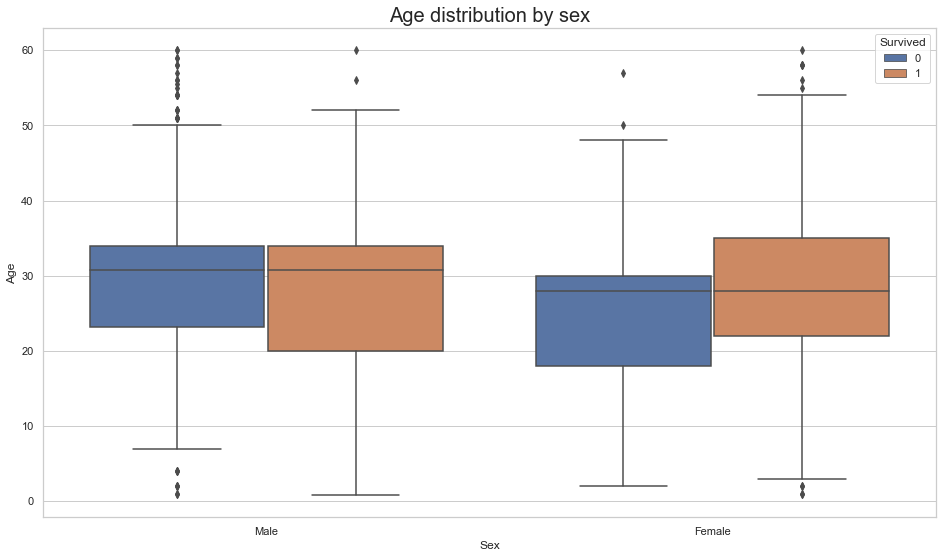

In [183]:
fig = plt.figure()

ax = sns.boxplot(x=df.Female, y=df.Age, hue=df.Survived)
ax.set_xticklabels(['Male', 'Female'])

plt.title('Age distribution by sex', fontsize=20)
plt.xlabel('Sex')

In [187]:
"""
Update numeric columns
"""
numeric_columns = df.loc[:, df.dtypes != object].columns

#### Categorical columns

In [192]:
df = df.drop(['Name', 'Ticket'], axis=1)

df.head()

In [194]:
categorical_columns = df.loc[:, df.dtypes == object].columns
categorical_columns

Index(['Cabin', 'Embarked'], dtype='object')

In [193]:
categorical_columns

Index(['Cabin', 'Embarked'], dtype='object')

Survivors' percentage for S category:	 33.2794830371567
Survivors' percentage for C category:	 54.0
Survivors' percentage for Q category:	 40.0


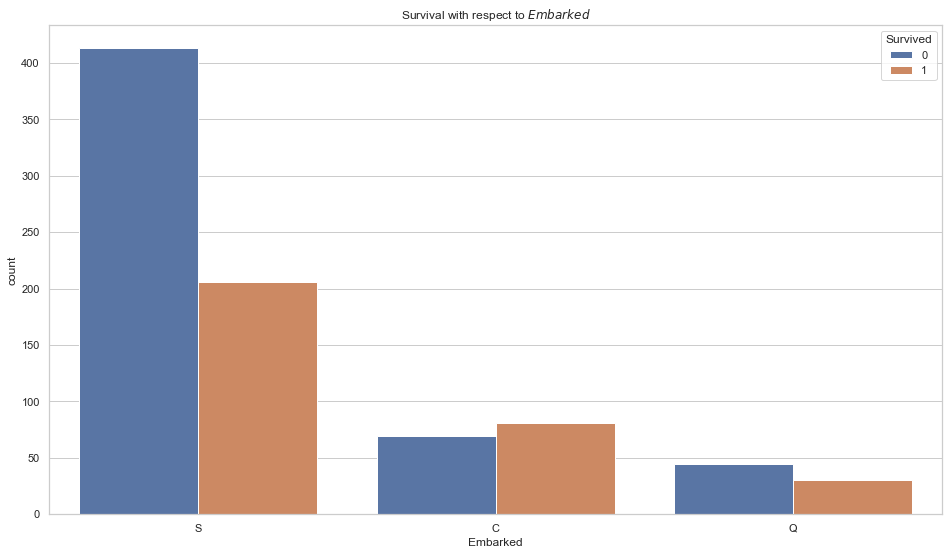

In [195]:
# sns.histplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival with respect to $Embarked$')

sns.countplot(x=df.Embarked, hue=df.Survived)

for value in df.Embarked.unique():
    print(f"Survivors' percentage for {value} category:\t"
          , 100 * df[df.Survived == 1] \
              .Embarked.value_counts()[value] / df[df.Embarked == value].shape[0])

In [196]:
for col in categorical_columns:
    df = pd.concat(
        (df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, drop_first=True))
        , axis=1
    )

In [197]:
df.head()

,Survived,Pclass,Age,Fare,Female,Relatives,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,1
2,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,0,0
3,1,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,53.1000,1,1,0,1,0,0,0,0,0,0,1
5,0,3,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,1


#### Models

In [299]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.calibration import CalibrationDisplay

pipe_lr = Pipeline([
    ('scaler_lr', StandardScaler()),
    ('model_lr', LogisticRegression())
])

params_lr = {
    'model_lr__C': np.linspace(0.01, 1, num=20)
}

search_lr = GridSearchCV(pipe_lr, params_lr, scoring='accuracy', cv=10)
search_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_lr', StandardScaler()),
                                       ('model_lr', LogisticRegression())]),
             param_grid={'model_lr__C': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ])},
             scoring='accuracy')

In [244]:
def get_model_score(model, model_name):
    print(f"{model_name}'s train accuracy:\t {model.score(X_train, y_train)}")
    print(f"{model_name}'s test accuracy:\t {model.score(X_test, y_test)}")
    
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'PR-Curve for {model_name}')
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'ROC-Curve for {model_name}')
    
#     CalibrationDisplay.from_estimator(model, X_test, y_test, n_bins=15)
#     plt.title(f'Calibration for {model_name}')

Logistic regression's train accuracy:	 0.8207407407407408
Logistic regression's test accuracy:	 0.7988165680473372


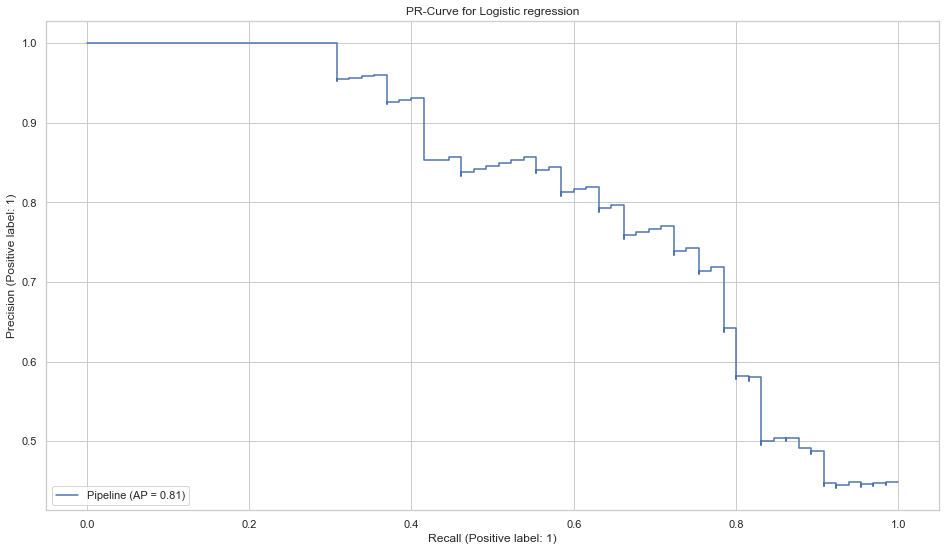

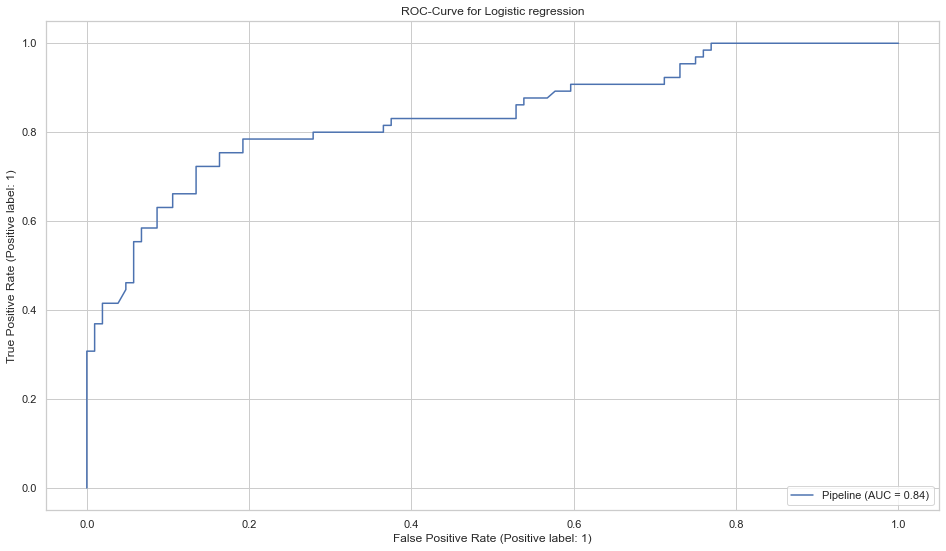

In [272]:
get_model_score(search_lr.best_estimator_, "Logistic regression")

Ridge regression

In [233]:
from sklearn.linear_model import RidgeClassifier

pipe_ridge = Pipeline([
    ('scaler_ridge', StandardScaler()),
    ('model_ridge', RidgeClassifier())
])

params_ridge = {
    'model_ridge__alpha': np.linspace(-10, 10, 100)
}

search_ridge = GridSearchCV(pipe_ridge, params_ridge, scoring='accuracy', cv=10)
search_ridge.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_ridge', StandardScaler()),
                                       ('model_ridge', RidgeClassifier())]),
             param_grid={'model_ridge__alpha': array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,...
         3.73737374,   3.93939394,   4.14141414,   4.34343434,
         4.54545455,   4.74747475,   4.94949495,   5.15151515,
         5.35353535,   5.55555556,   5.75757576,   5.95959596,
         6.16161616,   6.36363636,   6.56565657,   6.76767677,
         6.96969697,   7.17171717,   7.37373737,   7.57575758,
         7.77777778,   7.97979798,   8.18181818,   8.38383838,
         8.58585859,   8.78787879,   8.98989899,   9.19191919,
         9.39393939,   9.5959596 ,   9.7979798 ,  10.        ])}

Ridge regression's train accuracy:	 0.8088888888888889
Ridge regression's test accuracy:	 0.8106508875739645


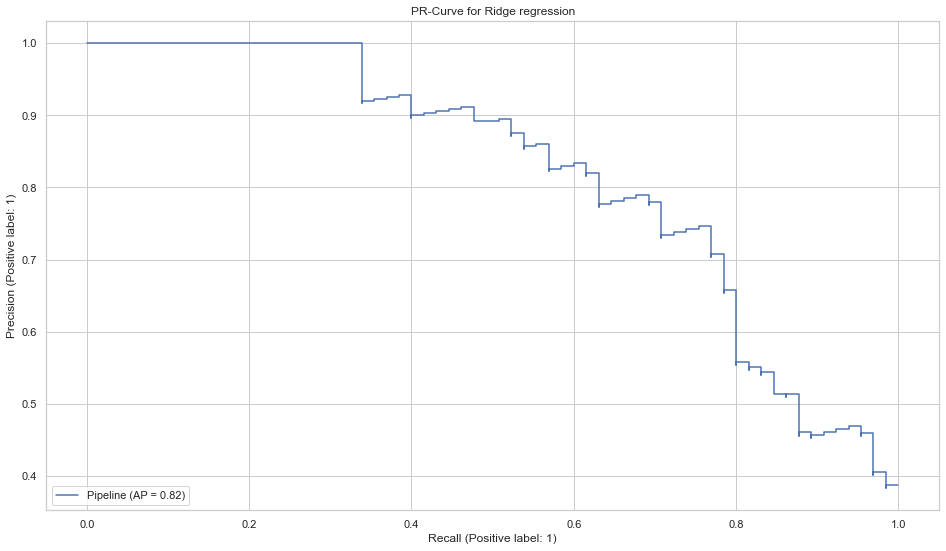

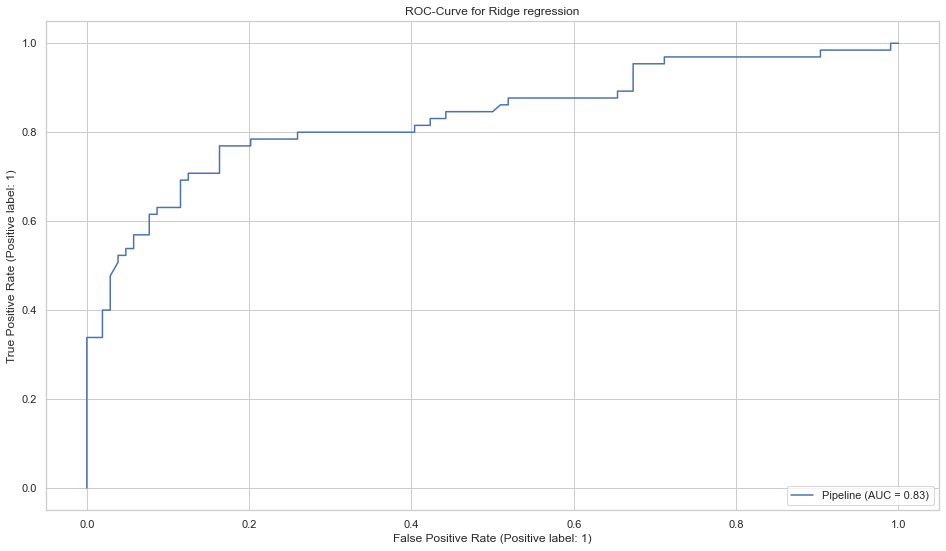

In [246]:
get_model_score(search_ridge.best_estimator_, "Ridge regression")

Decision tree classifier

In [260]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = Pipeline([
    ('scaler_dt', StandardScaler()),
    ('model_dt', DecisionTreeClassifier())
])

params_dt = {
    'model_dt__criterion': ['gini', 'entropy'],
    'model_dt__max_depth': range(1, 10, 2),
    'model_dt__min_samples_leaf': range(1, 7),
    'model_dt__min_samples_split': range(2, 9, 2)
}
search_dt = GridSearchCV(pipe_dt, params_dt, scoring='accuracy', cv=10, n_jobs=-1)
search_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_dt', StandardScaler()),
                                       ('model_dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model_dt__criterion': ['gini', 'entropy'],
                         'model_dt__max_depth': range(1, 10, 2),
                         'model_dt__min_samples_leaf': range(1, 7),
                         'model_dt__min_samples_split': range(2, 9, 2)},
             scoring='accuracy')

In [261]:
search_dt.best_params_

{'model_dt__criterion': 'gini',
 'model_dt__max_depth': 7,
 'model_dt__min_samples_leaf': 1,
 'model_dt__min_samples_split': 2}

Decision tree Classifier's train accuracy:	 0.9022222222222223
Decision tree Classifier's test accuracy:	 0.7869822485207101


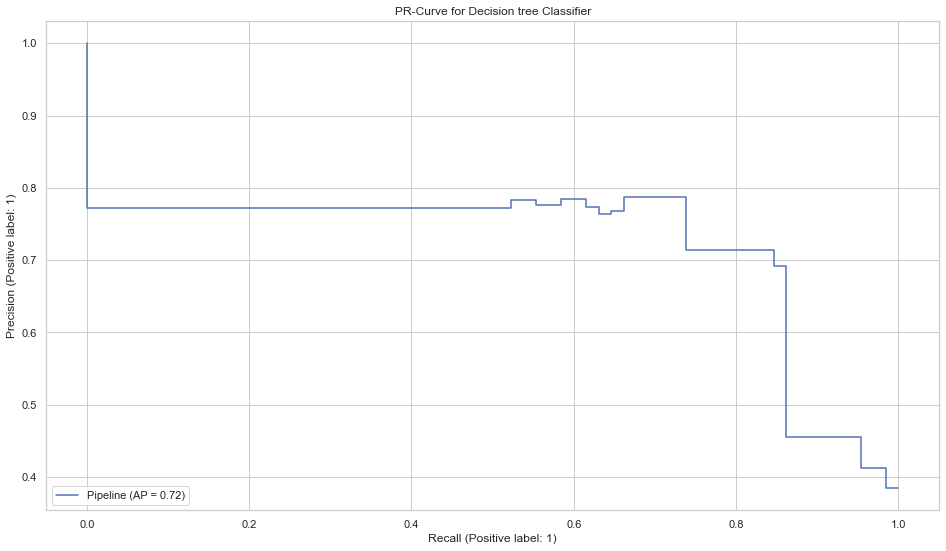

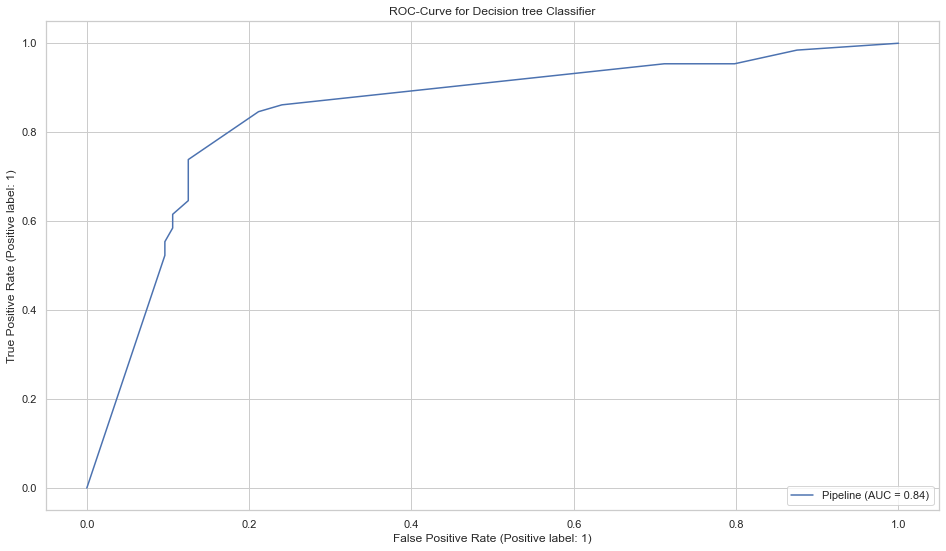

In [262]:
get_model_score(search_dt.best_estimator_, "Decision tree Classifier")

Random forest

In [256]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ('scaler_rf', StandardScaler()),
    ('model_rf', RandomForestClassifier())
])

params_rf = {
    'model_rf__max_depth': range(1, 10, 2),
    'model_rf__n_estimators': range(10, 50, 10),
    'model_rf__min_samples_leaf': range(1, 7),
    'model_rf__min_samples_split': range(2, 9, 2)
}
search_rf = GridSearchCV(pipe_rf, params_rf, scoring='accuracy', cv=10, n_jobs=-1)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_rf', StandardScaler()),
                                       ('model_rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model_rf__max_depth': range(1, 10, 2),
                         'model_rf__min_samples_leaf': range(1, 7),
                         'model_rf__min_samples_split': range(2, 9, 2),
                         'model_rf__n_estimators': range(10, 50, 10)},
             scoring='accuracy')

In [257]:
search_rf.best_params_

{'model_rf__max_depth': 7,
 'model_rf__min_samples_leaf': 2,
 'model_rf__min_samples_split': 8,
 'model_rf__n_estimators': 30}

Random forest Classifier's train accuracy:	 0.8577777777777778
Random forest Classifier's test accuracy:	 0.8047337278106509


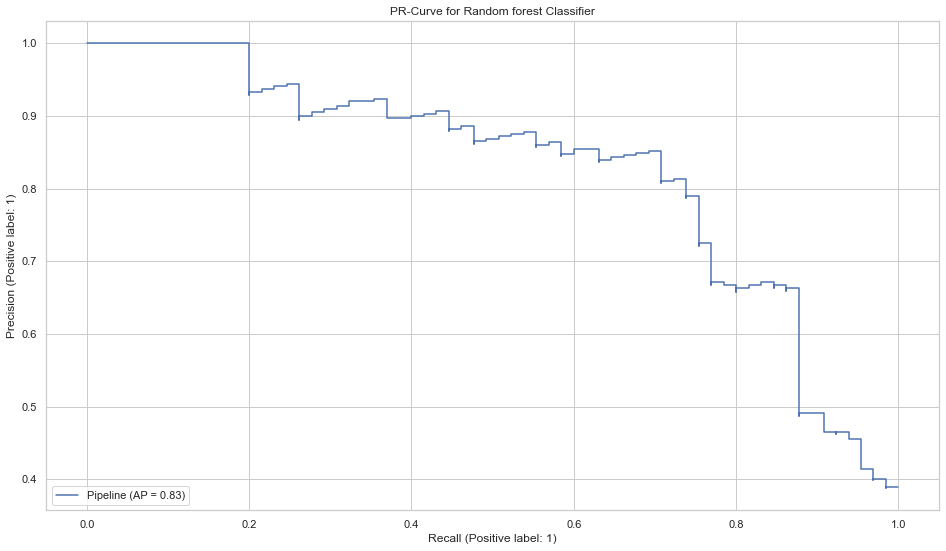

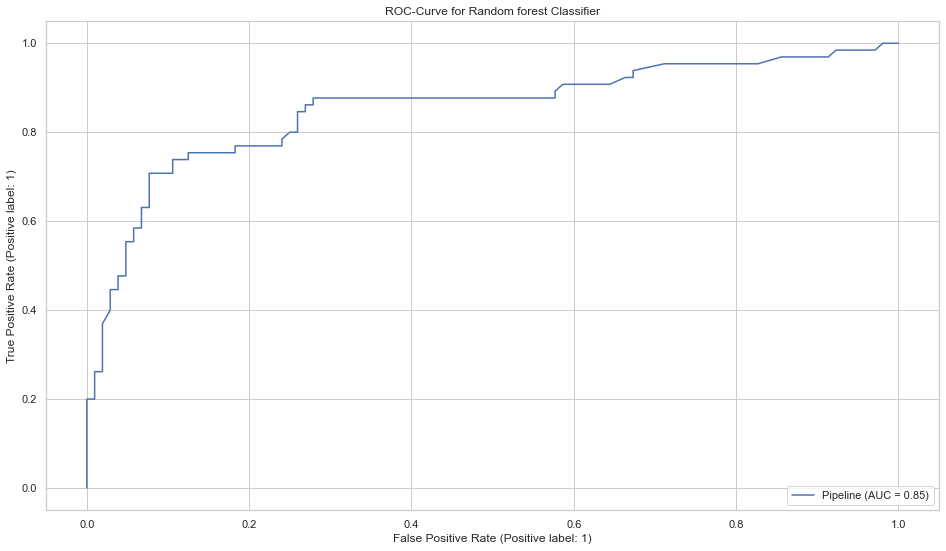

In [255]:
get_model_score(search_rf.best_estimator_, "Random forest Classifier")

Support Vector Machine

In [276]:
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ('scaler_svm', StandardScaler()),
    ('model_svm', SVC())
])

params_svm = {
    'model_svm__C': np.linspace(0.01, 1, num=10)
}

search_svm = GridSearchCV(pipe_svm, params_svm, scoring='accuracy', cv=10)
search_svm.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler_svm', StandardScaler()),
                                       ('model_svm', SVC())]),
             param_grid={'model_svm__C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
             scoring='accuracy')

SVM's train accuracy:	 0.8385185185185186
SVM's test accuracy:	 0.7928994082840237


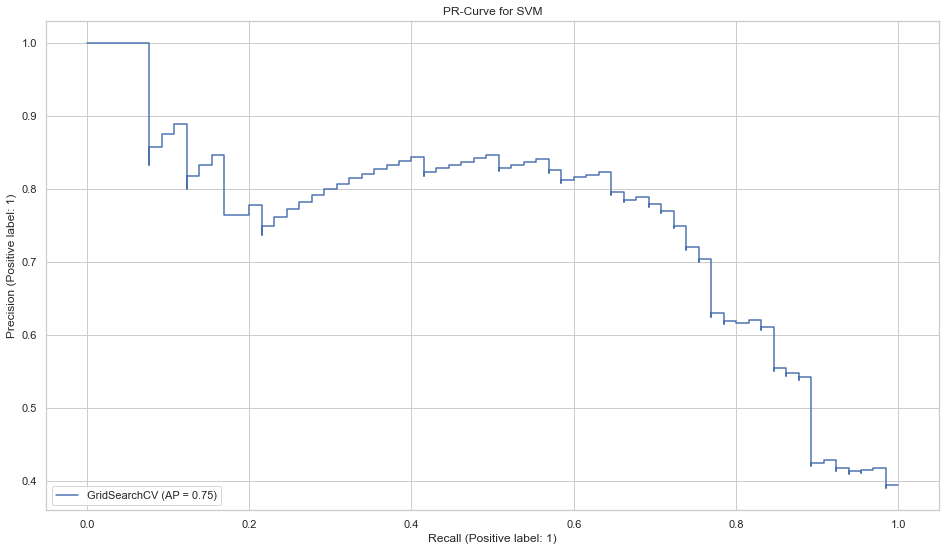

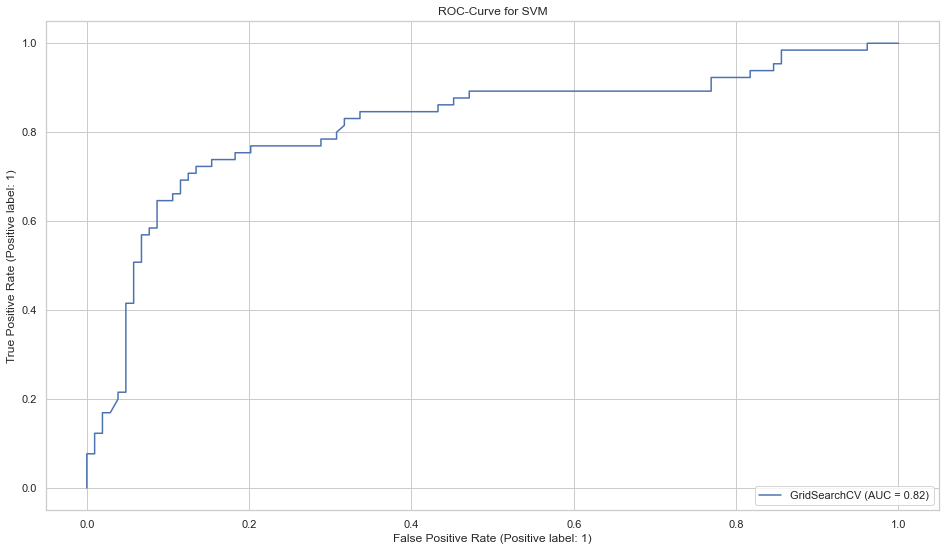

In [277]:
get_model_score(search_svm, "SVM")

Test data preprocessing

In [285]:
test_df = pd.read_csv('test.csv')

test_df.set_index('PassengerId', inplace=True)


test_df['Female'] = test_df.Sex.apply(lambda x: 1 if x == 'female' else 0)
test_df['Relatives'] = test_df.SibSp + test_df.Parch

test_df.Age = test_df.Age.fillna(
    test_df.groupby('Female').Age.transform('mean')
)
test_df.Embarked.fillna(
    test_df.Embarked.value_counts().index[0], inplace=True
)
test_df.Fare.fillna(
    np.mean(test_df.Fare), inplace=True
)

test_df.Cabin = test_df.Cabin.str[0]
test_df.Cabin = test_df.Cabin.fillna(
    test_df.Cabin.value_counts().index[0]
)


test_df.drop(['Name', 'Ticket', 'Sex', 'SibSp', 'Parch'], axis=1, inplace=True)
categorical_columns = test_df.loc[:, test_df.dtypes == object].columns

# test_df['age_outlier'] =  ((test_df.Age > lower_age_bound) & (test_df.Age < upper_age_bound))


for col in categorical_columns:
    test_df = pd.concat(
        (test_df.drop(col, axis=1), pd.get_dummies(test_df[col], prefix=col, drop_first=True))
        , axis=1
    )

test_df['Cabin_T'] = np.zeros(test_df.shape[0])

In [286]:
set(test_df.columns) == set(df.drop('Survived', axis=1).columns)

True

In [287]:
test_df.isna().any().any()

False

In [288]:
lr = search_lr.best_estimator_
ridge = search_ridge.best_estimator_
dt = search_dt.best_estimator_
rf = search_rf.best_estimator_
svm = search_svm.best_estimator_

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

Pipeline(steps=[('scaler_svm', StandardScaler()), ('model_svm', SVC(C=0.78))])

In [300]:
for model_key in models.keys():
    print(f'{model_key} accuracy: \t{models[model_key].score(X_test, y_test)}')
#     models[model].score(X_test, y_test)

lr accuracy: 	0.7988165680473372
ridge accuracy: 	0.8106508875739645
dt accuracy: 	0.8047337278106509
rf accuracy: 	0.8106508875739645
svm accuracy: 	0.7928994082840237


In [292]:
models = {
    'lr': lr,
    'ridge': ridge,
    'dt': dt,
    'rf': rf,
    'svm': svm
}

In [293]:
X_test = test_df

for model_key in models.keys():
    y_pred = models[model_key].predict(X_test)
    result = pd.concat((test_df.reset_index()[['PassengerId']], pd.DataFrame(y_pred)), axis=1)
    result.columns = ['PassengerId', 'Survived']
    result.to_csv(f'result_{model_key}.csv', index=False)